The **Nacional High School Exam**, or [ENEM](https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem)

O **Exame Nacional do Ensino Médio**, ou
[ENEM](https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem),
ocorre todo ano - desde 1998 - e é a maior prova do Brasil, com cerca de
[5 milhões de inscrições por
ano](http://portal.inep.gov.br/artigo/-/asset_publisher/B4AQV9zFY7Bv/content/5-8-milhoes-estao-inscritos-para-fazer-o-enem-2020/21206#:~:text=Finalizadas%20as%20etapas%20de%20inscri%C3%A7%C3%A3o,Ensino%20M%C3%A9dio%20(Enem)%202020.).   

Nesse último ano, a prova foi um pouco diferente, devido ao coronavírus,
que acarretou em adiação da prova, diversas
[medidas](https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem/orientacoes/medidas-de-prevencao-a-covid-19)
preventivas para a realização do exame e a maior abstenção da história:
[mais da metade dos candidatos não foram realizar o
exame](https://educacao.uol.com.br/noticias/2021/01/17/mec-culpa-medo-da-covid-19-e-midia-contra-por-abstencao-de-515-no-enem.htm). 

![](https://github.com/KenzoBH/Data-Science/blob/main/Images/Slide3.PNG)

De fato, trata-se de uma grande experiência na vida do estudante
brasileiro que busca uma vaga na universidade, visto que o ENEM é uma
porta de entrada para diversas faculdades acerca do país - além de ser o
processo seletivo das universidades federais do Brasil. Diversas
universidades (inclusive públicas), além de seus próprios vestibulares,
oferecem vagas exclusivas para o exame, pelo
[SiSU](https://sisu.mec.gov.br/) (Sistema de Seleção Unificada), e
diversas universidades particulares oferecem bolsas de estudos aos
participantes relativas às suas notas no exame.   

A prova é realizada em dois dias: um reservado para as disciplinas de
Ciências Humanas, Linguagens e a Redação, e outro dia para Matemática e
Ciências da Natureza (atualmente a prova segue sse padrão, mas já foi
diferente, e pode ser diferente no momento de sua leitura).   

Neste artigo, a gente vai explorar um pouco os dados - disponibilizados
pelo próprio [Inep](https://enem.inep.gov.br/participante/), órgão
responsável pelo exame - relativos aos exames de 2007 a 2015 organizados
por escola. Os dados foram baixados neste
[link](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem-por-escola).   

É notável, portanto, que a escola em que o candidato estudou tem forte
influência no seu desempenho. Muitas vezes, com um ensino não tão bom em
suas escolas, muitos buscam fazer cursinhos preparatórios para o ENEM.   
Veremos a seguir as relações entre a natureza da escola com o desempenho
de seus estudantes. Como o ambiente influencia no futuro do candidato?
Influencia de fato? Veremos!  

***

## Sumário

1. [Data import](https://github.com/KenzoBH/Data-Science/blob/main/ENEM_R/ENEM_R.md#1-importa%C3%A7%C3%A3o-do-dataset)
2. [Brazil](https://github.com/KenzoBH/Data-Science/blob/main/ENEM_R/ENEM_R.md#2-brasil)
    1. [Performance by state: which is the best in Humanities?](https://github.com/KenzoBH/Data-Science/blob/main/ENEM_R/ENEM_R.md#21-desempenho-por-estado-qual-o-melhor-estado-em-ci%C3%AAncias-humanas)
    2. [Desempenho por tipo administrativo: escolas privadas vão melhor no ENEM?](https://github.com/KenzoBH/Data-Science/blob/main/ENEM_R/ENEM_R.md#22-desempenho-por-tipo-administrativo-escolas-privadas-v%C3%A3o-melhor-no-enem)
3. [Sudeste](https://github.com/KenzoBH/Data-Science/blob/main/ENEM_R/ENEM_R.md#3-sudeste)
    1. [Desempenho no sudeste: SP é o melhor estado no ENEM?](https://github.com/KenzoBH/Data-Science/blob/main/ENEM_R/ENEM_R.md#31-desempenho-no-sudeste-sp-%C3%A9-o-melhor-estado-no-enem)
    2. [Desempenho no sudeste por tipo adminstrativo: como são as federais?](https://github.com/KenzoBH/Data-Science/blob/main/ENEM_R/ENEM_R.md#32-desempenho-no-sudeste-por-tipo-adminstrativo-como-s%C3%A3o-as-federais)
4. [São Paulo](https://github.com/KenzoBH/Data-Science/blob/main/ENEM_R/ENEM_R.md#4-s%C3%A3o-paulo)
    1. [Desempenho pela localização: escolas urbanas e rurais](https://github.com/KenzoBH/Data-Science/blob/main/ENEM_R/ENEM_R.md#4-s%C3%A3o-paulo)
    2. [São Paulo capital: a geografia na nota](https://github.com/KenzoBH/Data-Science/blob/main/ENEM_R/ENEM_R.md#4-s%C3%A3o-paulo)
    3. [Sobre as públicas](https://github.com/KenzoBH/Data-Science/blob/main/ENEM_R/ENEM_R.md#43-sobre-as-p%C3%BAblicas)
    4. [Sobre as escolas técnicas](https://github.com/KenzoBH/Data-Science/blob/main/ENEM_R/ENEM_R.md#44-sobre-as-escolas-t%C3%A9cnicas)    
5. [Conclusão](https://github.com/KenzoBH/Data-Science/blob/main/ENEM_R/ENEM_R.md#5-conclus%C3%A3o)

***

## 1. Data import

First, we'll import some libraries to manipulate our data. I will use `numpy`, `pandas` and `matplotlib`. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
enem = pd.read_csv('MICRODADOS_ENEM_ESCOLA.csv', sep = ';',
                  encoding = 'ISO-8859-1', low_memory = False)
enem.head()

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,...,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
0,2007,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,144,...,NaN,NaN,69.03,NaN,NaN,NaN,91.9,8.1,0.0,Maior que 90 alunos
1,2006,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,184,...,NaN,NaN,57.82,NaN,NaN,NaN,NaN,NaN,NaN,Maior que 90 alunos
2,2005,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,...,NaN,NaN,64.83,NaN,NaN,NaN,86.5,12.4,1.1,Maior que 90 alunos
3,2008,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,186,...,72.16,60.02,NaN,NaN,NaN,NaN,90.3,9.7,0.0,Maior que 90 alunos
4,2007,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,19,...,NaN,NaN,58.84,NaN,NaN,NaN,74.2,21.0,4.8,De 1 a 30 alunos


In [3]:
enem.shape

(172305, 27)

In [4]:
(enem.isna().sum() / 172305) * 100

NU_ANO                        0.000000
CO_UF_ESCOLA                  0.000000
SG_UF_ESCOLA                  0.000000
CO_MUNICIPIO_ESCOLA           0.000000
NO_MUNICIPIO_ESCOLA           0.000000
CO_ESCOLA_EDUCACENSO          0.000000
NO_ESCOLA_EDUCACENSO          0.000000
TP_DEPENDENCIA_ADM_ESCOLA     0.000000
TP_LOCALIZACAO_ESCOLA         0.000000
NU_MATRICULAS                 0.000000
NU_PARTICIPANTES_NEC_ESP     73.677490
NU_PARTICIPANTES              0.000000
NU_TAXA_PARTICIPACAO         39.243202
NU_MEDIA_CN                  39.243202
NU_MEDIA_CH                  39.243202
NU_MEDIA_LP                  39.243202
NU_MEDIA_MT                  39.243202
NU_MEDIA_RED                 28.353211
NU_MEDIA_OBJ                 88.889469
NU_MEDIA_TOT                 71.867328
INSE                         90.948028
PC_FORMACAO_DOCENTE          73.697803
NU_TAXA_PERMANENCIA          82.081193
NU_TAXA_APROVACAO             9.912075
NU_TAXA_REPROVACAO            9.912075
NU_TAXA_ABANDONO         

In [5]:
selected = ['NU_ANO', 'SG_UF_ESCOLA', 'NO_MUNICIPIO_ESCOLA', 'NO_ESCOLA_EDUCACENSO',
          'TP_DEPENDENCIA_ADM_ESCOLA', 'TP_LOCALIZACAO_ESCOLA',
          'NU_MEDIA_CN', 'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT', 'NU_MEDIA_RED']
enem_selected = enem[selected]

enem2015 = enem_selected[enem_selected['NU_ANO'] == 2015]
enem2015.sample(5)

,NU_ANO,SG_UF_ESCOLA,NO_MUNICIPIO_ESCOLA,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED
103403,2015,MG,Juiz de Fora,EE MARIA ILYDIA RESENDE ANDRADE,2,1,446.72,523.51,465.67,415.84,453.91
115242,2015,RJ,Arraial do Cabo,CE VINTE DE JULHO,2,1,455.84,535.89,496.64,452.87,526.32
126011,2015,SP,Santa Bárbara d'Oeste,LUIZ ALVES CEL,2,1,463.85,547.08,497.99,460.32,502.79
148165,2015,PR,Cascavel,COLEGIO MARISTA DE CASCAVEL,4,1,559.52,628.36,565.93,590.58,679.86
86734,2015,PB,Logradouro,EEEFM PREFEITO JOSE ANTONIO NEVES,2,1,427.01,530.25,434.97,455.89,496.92


In [6]:
pt_to_en = {
    'NU_ANO': 'year',
    'SG_UF_ESCOLA': 'state',
    'NO_MUNICIPIO_ESCOLA': 'city',
    'NO_ESCOLA_EDUCACENSO': 'school',
    'TP_DEPENDENCIA_ADM_ESCOLA': 'administrative_dependency',
    'TP_LOCALIZACAO_ESCOLA': 'localization',
    'NU_MEDIA_CN': 'mean_nat',
    'NU_MEDIA_CH': 'mean_hum',
    'NU_MEDIA_LP': 'mean_lan',
    'NU_MEDIA_MT': 'mean_mat',
    'NU_MEDIA_RED': 'mean_com'
}

enem2015 = enem2015.rename(columns = pt_to_en)
enem2015

,year,state,city,school,administrative_dependency,localization,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
67619,2015,RO,Porto Velho,CENTRO DE ENSINO CLASSE A,4,1,591.64,652.34,604.53,627.66,732.00
67628,2015,RO,Porto Velho,CENTRO EDUCACIONAL MOJUCA,4,1,458.46,533.51,472.62,459.72,507.82
67640,2015,RO,Porto Velho,CENTRO EDUCACIONAL OBJETIVO,4,1,529.05,583.87,547.11,507.22,652.43
67642,2015,RO,Porto Velho,COLEGIO DOM BOSCO,4,1,508.74,586.45,531.35,529.87,591.84
67648,2015,RO,Porto Velho,CENTRO EDUCACIONAL OBJETIVO - UNIDADE JARDIM A...,4,1,523.38,591.66,563.45,528.93,583.48
...,...,...,...,...,...,...,...,...,...,...,...
172288,2015,DF,Brasília,COL OLIMPO,4,1,685.80,704.46,643.27,786.28,848.77
172292,2015,DF,Brasília,CED DONA AMERICA GUIMARAES,2,1,455.88,550.85,502.78,452.82,531.37
172296,2015,DF,Brasília,CED 01 DO RIACHO FUNDO II,2,1,469.75,554.48,507.93,456.23,514.74
172302,2015,DF,Brasília,CED 310 DE SANTA MARIA,2,1,458.71,540.94,497.75,428.90,517.24


In [7]:
enem2015.shape

(15598, 11)

## 2. Brazil

Agora, vamos comparar desempenho do país inteiro nessa edição do ENEM. Começaremos com a média da nota em Ciências Humanas. 

### 2.1. Performance by state: which is the best in Humanities?

Como se dá as médias dos estados na prova de Ciências
Humanas? Quais suas expectativas?

In [8]:
pd.DataFrame(enem2015.groupby('state')['mean_hum'].mean())

,mean_hum
state,
AC,544.301818
AL,547.594645
AM,547.673049
AP,535.742759
BA,568.314375
CE,543.544809
DF,581.789412
ES,560.544606
GO,555.947051


### 2.2 Desempenho por tipo administrativo: escolas privadas vão melhor no ENEM?

Agora, veremos se o tipo administrativo da escola está relacionado com o
desempenho dos alunos.  
Primeiramente, vejamos a quantidade de escolas por tipo administrativo.

In [9]:
pd.DataFrame(enem2015['administrative_dependency'].value_counts())

,administrative_dependency
2,8836
4,6325
1,328
3,109


In [24]:
dep_dict = {
    1 : "Federal",
    2 : "Municipal" ,
    3 : "State",
    4 : "Private"}

enem2015['administrative_dependency'].replace(dep_dict, inplace = True)
enem2015.sample(5)

,year,state,city,school,administrative_dependency,localization,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
123482,2015,SP,São Paulo,BRASILIO MACHADO,Municipal,1,485.18,573.60,528.40,484.41,550.68
81566,2015,CE,Ibaretama,EEM CONEGO LUIZ BRAGA ROCHA,Municipal,1,429.00,512.31,436.13,413.40,435.56
158623,2015,RS,Ipê,ESC EST EDUC BAS FREI CASIMIRO ZAFFONATO,Municipal,1,485.17,572.24,509.67,477.95,571.25
120164,2015,RJ,Rio de Janeiro,COLEGIO MV1 GALEAO,Private,1,562.59,634.86,581.58,601.24,674.69
112504,2015,ES,Cariacica,EEEFM PROFESSORA MARIA PENEDO,Municipal,1,479.28,557.66,508.94,464.40,539.68


Text(0.5, 0.98, '')

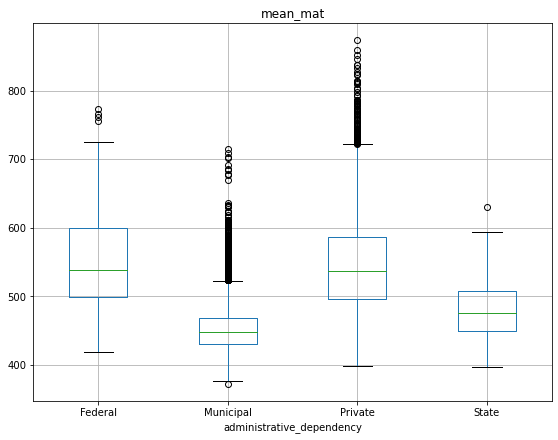

In [11]:
enem2015.boxplot(column = 'mean_mat', by = 'administrative_dependency',
                 figsize = (9, 7))
plt.suptitle('')

In [12]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [13]:
southeast_filter = enem2015['state'].isin(['ES', 'MG', 'RJ', 'SP'])
enem2015_se = enem2015[southeast_filter]
enem2015_se.sample(5)

,year,state,city,school,administrative_dependency,localization,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
110409,2015,MG,Formiga,COL LOSANGO DE FORMIGA,Private,1,591.87,645.59,587.94,632.05,698.62
128054,2015,SP,Lins,21 DE ABRIL,Municipal,1,462.85,531.44,490.05,439.84,531.06
121186,2015,RJ,São Gonçalo,COLEGIO MV1 SAO GONCALO,Private,1,510.45,586.04,548.35,502.10,633.13
140845,2015,SP,Presidente Epitácio,MARINA AMARANTE RIBEIRO VASQUES SANCHES PROFES...,Municipal,1,460.38,526.74,477.54,438.12,471.88
106144,2015,MG,Sete Lagoas,EE JOSE EVANGELISTA FRANCA,Municipal,1,438.82,524.13,485.01,458.77,490.91


Text(0.5, 0.98, '')

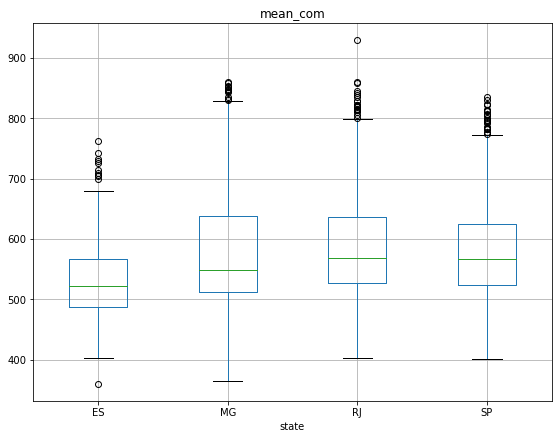

In [14]:
enem2015_se.boxplot(column = 'mean_com', by = 'state',
                 figsize = (9, 7))
plt.suptitle('')

In [15]:
enem2015_se[enem2015_se['mean_com'] > 900]

,year,state,city,school,administrative_dependency,localization,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
122025,2015,RJ,Rio de Janeiro,CEMP ENSINO MEDIO LTDA,Private,1,633.23,676.42,626.19,694.99,930.0


gráfico de barras dos estados e média em redação, colorido conforme a dep adm

enem2015_sud %>% 
  group_by(SG_UF_ESCOLA, TP_DEPENDENCIA_ADM_ESCOLA) %>% 
  summarise(MED_RED = mean(NU_MEDIA_RED, na.rm = TRUE)) %>% 
  ggplot(aes(x = SG_UF_ESCOLA, y = MED_RED, fill = TP_DEPENDENCIA_ADM_ESCOLA)) +
  geom_col(position = "dodge") +
  labs(title = "Média em Redação por Estados do Sudeste e Tipo Administrativo",
       x = "Estado", y = "Média em Redação do ENEM", fill = "Tipo Administrativo") +
  theme_bw()

In [16]:
es_filter = (enem2015_se['state'] == 'ES')
es = enem2015_se[es_filter]
es.isna().sum()

year                         0
state                        0
city                         0
school                       0
administrative_dependency    0
localization                 0
mean_nat                     0
mean_hum                     0
mean_lan                     0
mean_mat                     0
mean_com                     0
dtype: int64

In [28]:
sp_filter = (enem2015_se['state'] == 'SP')
enem2015_sp = enem2015_se[sp_filter]
enem2015_sp.sample(5)

,year,state,city,school,administrative_dependency,localization,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
128904,2015,SP,Pereira Barreto,MITSUSADA UMETANI DR,Municipal,1,438.02,509.12,481.74,441.03,447.78
124308,2015,SP,São Bernardo do Campo,LAUDO FERREIRA DE CAMARGO MINISTRO,Municipal,1,465.17,543.85,509.70,472.58,561.25
130094,2015,SP,São Paulo,BRANCA CASTRO CANTO E MELO PROFESSORA,Municipal,1,464.54,547.78,514.58,478.56,492.50
135158,2015,SP,Ourinhos,SESI 144 CENTRO EDUCACIONAL,Private,1,533.44,610.08,552.80,568.30,592.14
131883,2015,SP,São Paulo,NOSSA SENHORA DAS DORES COLEGIO,Private,1,533.33,605.66,548.59,558.38,581.60


In [29]:
local = enem2015_sp.loc[:, :].copy()
local['localization'].replace([1, 2], ['Urban', 'Rural'], inplace = True)
enem2015_sp = local
enem2015_sp

,year,state,city,school,administrative_dependency,localization,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
122637,2015,SP,São Paulo,MARIANO DE OLIVEIRA PROFESSOR,Municipal,Urban,459.60,546.20,506.89,440.49,521.83
122640,2015,SP,São Paulo,SILVIO XAVIER ANTUNES PROFESSOR,Municipal,Urban,457.21,541.97,503.26,437.66,479.49
122663,2015,SP,São Paulo,ERMANO MARCHETTI,Municipal,Urban,470.81,554.04,509.87,447.22,533.13
122664,2015,SP,São Paulo,HUMBERTO DE SOUZA MELLO GENERAL,Municipal,Urban,466.08,536.28,502.71,439.73,535.07
122677,2015,SP,São Paulo,MANUEL DA NOBREGA PADRE,Municipal,Urban,467.01,546.34,510.41,440.67,528.00
...,...,...,...,...,...,...,...,...,...,...,...
145603,2015,SP,Hortolândia,HORTOLANDIA ETEC,Municipal,Urban,525.88,610.88,568.14,546.68,620.43
145609,2015,SP,São Roque,SAO ROQUE ETEC DE,Municipal,Urban,558.81,633.17,583.17,589.34,626.47
145614,2015,SP,Jacareí,DARCI LOPES PROFA,Municipal,Urban,443.77,515.31,479.49,433.87,514.78
145617,2015,SP,Capão Bonito,BAIRRO TURVO DOS ALMEIDAS,Municipal,Rural,454.78,518.56,455.16,459.45,486.67


enem2015_SP %>% 
  group_by(TP_LOCALIZACAO_ESCOLA) %>% 
  summarise(MED_NAT = mean(NU_MEDIA_CN, na.rm = TRUE)) %>% 
  ggplot(aes(x = TP_LOCALIZACAO_ESCOLA, y = MED_NAT, fill = TP_LOCALIZACAO_ESCOLA)) + 
  geom_col(show.legend = FALSE) +
  labs(title = "Média das escolas de São Paulo em Ciências da Natureza por localização",
       x = "Localização", y  = "Média em Ciências da Natureza (Biologia, Química e Física)") +
  theme_bw()

In [30]:
composition_filter = enem2015_sp['mean_com'] > 750
enem2015_sp[composition_filter].sort_values(
    by = 'mean_com', ascending = False).head()

,year,state,city,school,administrative_dependency,localization,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
141416,2015,SP,Ribeirão Preto,SEB COC UNIDADE ALVARES CABRAL,Private,Urban,676.02,683.77,632.48,719.44,835.71
142602,2015,SP,São Paulo,VITAL BRAZIL COLEGIO,Private,Urban,631.11,664.92,605.77,714.21,830.78
137464,2015,SP,São Paulo,PENTAGONO COLEGIO UNIDADE CAIUBI,Private,Urban,616.42,667.68,619.12,693.54,823.33
140283,2015,SP,São Carlos,SAO CARLOS INSTITUTO EDUCACAO DE ENSINO FUNDAM...,Private,Urban,648.93,688.47,635.75,709.35,821.94
132430,2015,SP,São Paulo,LICEU DE ARTES E OFICIOS DE SAO PAULO ESCOLA T...,Private,Urban,650.56,691.59,632.86,782.11,814.26


SP_melhores %>% 
  mutate(CAPITAL = ifelse(NO_MUNICIPIO_ESCOLA == "São Paulo",
                          "Capital", "Interior")) %>% 
  ggplot(aes(x = CAPITAL, fill = CAPITAL)) +
  geom_bar(show.legend = FALSE) +
  labs(title = "Quantidade de escolas dentre as melhores de SP",
       x = "Localização", y = "Quantidade") +
  theme_bw()

enem2015_SP %>% 
  mutate(CAPITAL = ifelse(NO_MUNICIPIO_ESCOLA == "São Paulo",
                          "Capital", "Interior")) %>% 
  ggplot(aes(x = CAPITAL, fill = CAPITAL)) +
  geom_bar(show.legend = FALSE) +
  labs(title = "Quantidade de escolas em SP",
       x = "Localização", y = "Quantidade") +
  theme_bw()

In [31]:
sp_publics = enem2015_sp[enem2015_sp['administrative_dependency'] != 'Private']
sp_publics.sort_values(by = 'mean_mat', ascending = False).head()

,year,state,city,school,administrative_dependency,localization,mean_nat,mean_hum,mean_lan,mean_mat,mean_com
131094,2015,SP,Campinas,CAMPINAS COLEGIO TECNICO DE - UNICAMP,Municipal,Urban,604.06,647.37,600.03,708.29,653.47
145185,2015,SP,Bauru,COL TEC INDUSTRIAL PROF ISAAC PORTAL ROLDAN UNESP,Municipal,Urban,618.94,665.28,614.48,702.57,683.25
145625,2015,SP,São Paulo,IFSP - CAMPUS SAO PAULO,Federal,Urban,605.28,662.32,610.49,702.40,647.54
131136,2015,SP,Guaratinguetá,CARLOS AUGUSTO PATRICIO AMORIM PROF CTIG UNESP,Municipal,Urban,591.39,639.62,596.07,702.13,675.10
144425,2015,SP,São Paulo,SAO PAULO ETEC DE,Municipal,Urban,617.86,677.17,623.83,691.92,707.27


In [32]:
enem2015_sp['technical'] = np.nan
enem2015_sp.head()

,year,state,city,school,administrative_dependency,localization,mean_nat,mean_hum,mean_lan,mean_mat,mean_com,technical
122637,2015,SP,São Paulo,MARIANO DE OLIVEIRA PROFESSOR,Municipal,Urban,459.60,546.20,506.89,440.49,521.83,NaN
122640,2015,SP,São Paulo,SILVIO XAVIER ANTUNES PROFESSOR,Municipal,Urban,457.21,541.97,503.26,437.66,479.49,NaN
122663,2015,SP,São Paulo,ERMANO MARCHETTI,Municipal,Urban,470.81,554.04,509.87,447.22,533.13,NaN
122664,2015,SP,São Paulo,HUMBERTO DE SOUZA MELLO GENERAL,Municipal,Urban,466.08,536.28,502.71,439.73,535.07,NaN
122677,2015,SP,São Paulo,MANUEL DA NOBREGA PADRE,Municipal,Urban,467.01,546.34,510.41,440.67,528.00,NaN


In [25]:
technical = enem2015_sp.copy()
technical['technical'] = np.where(technical['school'].str.contains('TEC'),
                                 'Technical', 'Not technical')
enem2015_sp['technical'] = technical['technical']
enem2015_sp.sample(5)

,year,state,city,school,administrative_dependency,localization,mean_nat,mean_hum,mean_lan,mean_mat,mean_com,technical
140369,2015,SP,Itaquaquecetuba,APOLLO COLEGIO,Private,Urban,528.70,583.85,527.26,546.53,551.20,Not technical
139726,2015,SP,São Paulo,BATISTA BIBLICO INSTITUTO EDUCACIONAL,Private,Urban,485.33,578.75,552.89,493.70,582.22,Not technical
138963,2015,SP,Itatiba,LITTERATUS COLEGIO,Private,Urban,571.58,620.03,569.24,598.51,625.00,Not technical
124029,2015,SP,Mauá,THEREZINHA SARTORI PROFESSORA,Municipal,Urban,460.05,547.07,515.76,467.21,533.51,Not technical
144896,2015,SP,Jarinu,DUILIO MAZIERO,Municipal,Urban,467.68,542.84,487.14,461.43,496.14,Not technical


SP_tecnicas %>% 
  ggplot(aes(x = Tecnica, fill = Tecnica)) +
  geom_bar(show.legend = FALSE) +
  labs(title = "Tipo de escola pública em SP",
       x = NULL, y = "Quantidade") +
  theme_bw()

In [23]:
SP_tecnicas %>% 
  filter(NU_MEDIA_MT > 600) %>% 
  ggplot(aes(x = Tecnica, fill = Tecnica)) +
  geom_bar(show.legend = FALSE) +
  labs(title = "Tipo de escola dentre as melhores públicas em SP",
       x = NULL, y = "Quantidade") +
  theme_bw()

SyntaxError: invalid syntax (<ipython-input-23-db1ed831fbf0>, line 1)